<a href="https://colab.research.google.com/github/shruthad/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random 
import keras.utils
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import KFold


In [ ]:
#loading dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
print(type(x_train),type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:

#evaluate loaded dataset
print('Dim of X train is ',x_train.shape)
print('Dim of y train is ',y_train.shape)
print('Dim of X test is ',x_test.shape)
print('Dim of y test is ',y_test.shape)

Dim of X train is  (60000, 28, 28)
Dim of y train is  (60000,)
Dim of X test is  (10000, 28, 28)
Dim of y test is  (10000,)


In [ ]:
#shape of each data
ex_image = x_train[0]
ex_label = y_train[0]

print('Shape of ex is ',ex_image.shape)
print('label of ex is ',ex_label)

Shape of ex is  (28, 28)
label of ex is  5


([], <a list of 0 Text major ticklabel objects>)

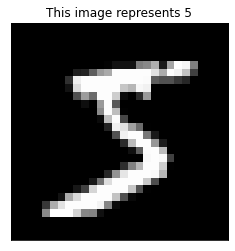

In [ ]:
plt.imshow(ex_image,cmap=plt.cm.gray)
plt.title('This image represents {}'.format(ex_label))
plt.xticks([])
plt.yticks([])

In [ ]:
def show(image, title):
    index = 1 
    plt.figure(figsize=(10,5))

    for x in zip(image, title):        
        image = x[0]        
        title = x[1]
        plt.subplot(2, 5, index)        
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray)  
        plt.title(x[1], fontsize = 9)
        plt.xticks([])
        plt.yticks([])
        index += 1

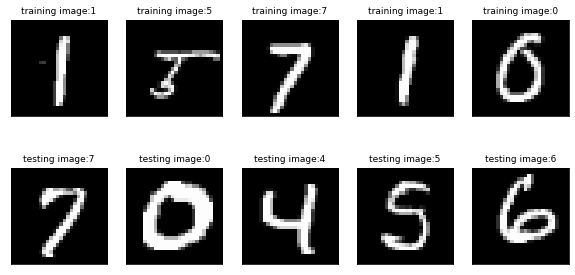

In [ ]:
image = []
title = []
for i in range(0, 5):
    r = random.randint(1, len(x_train))
    image.append(x_train[r])
    title.append('training image:' + str(y_train[r]))       

for i in range(0, 5):
    r = random.randint(1, len(x_test))
    image.append(x_test[r])
    title.append('testing image:' + str(y_test[r]))
    
show(image, title)

In [ ]:
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
# one hot encode target values
y_train =  keras.utils.to_categorical(y_train)
y_test =  keras.utils.to_categorical(y_test)

In [ ]:
#convert from integer to float and normalize to range 0-1
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
#cnn using Alexnet architecture
model = Sequential()
#This gets our neural network as sequential network
#1st convolution layer
model.add(Conv2D(96, (11,11),input_shape = (28,28,1), activation='relu'))
model.add(BatchNormalization())
#max pooling
model.add(MaxPooling2D(3, strides=2))
#2nd convolution layer
model.add(Conv2D(256, 5, padding='same', activation='relu'))
model.add(BatchNormalization())
#max pooling
model.add(MaxPooling2D(3, strides=2))
#3rd convolution layer
model.add(Conv2D(384, 3, strides=1, padding='same', activation='relu'))
#4th convolution layer
model.add(Conv2D(384, 3, strides=1, padding='same', activation='relu'))
#5th convolution layer
model.add(Conv2D(256, 3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
#max pooling
model.add(MaxPooling2D(3, strides=2))
model.add(Flatten())
#1st fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
#Dropout to prevent overfitting
#2nd fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
#3rd fully connected layers
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
#compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		
		# select rows for train and test
		x_train, y_train, xtest, ytest = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
		# evaluate model
		_, acc = model.evaluate(x_test, y_test, verbose=1)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
scores, histories = evaluate_model(x_train,y_train)

Epoch 1/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.0998 - accuracy: 0.9851 - val_loss: 0.0846 - val_accuracy: 0.9846
Epoch 2/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.0933 - accuracy: 0.9838 - val_loss: 0.0404 - val_accuracy: 0.9923
Epoch 3/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.0458 - accuracy: 0.9901 - val_loss: 0.0616 - val_accuracy: 0.9886
Epoch 4/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.0433 - accuracy: 0.9910 - val_loss: 0.0377 - val_accuracy: 0.9928
Epoch 5/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.0396 - accuracy: 0.9914 - val_loss: 0.0583 - val_accuracy: 0.9881
Epoch 6/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.0658 - accuracy: 0.9890 - val_loss: 0.0462 - val_accuracy: 0.9913
Epoch 7/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.0400 - accuracy: 0.9924 - val_loss: 0.0355 -

Accuracy: mean=99.184 std=0.173, n=5


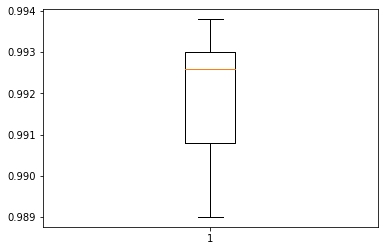

In [ ]:

# summarize model performance

from numpy import mean
from numpy import std
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()
	# summarize estimated performance
summarize_performance(scores)
 

In [ ]:
model.save("final_model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 96)        11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 18, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 384)         8

In [ ]:
import numpy as np
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model("final_model.h5")
	# predict the class
	digit =model.predict_classes(img)
	print(digit[0])
 
# entry point, run the example
run_example()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
7
